# Анализ качества работы нейронной сети для распознавания моделей одежды в Keras

In [101]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import utils
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

## Включить CUDA
(или хотя бы попытаться...)

In [102]:
print("TF:", tf.__version__)
print("GPUs:", tf.config.list_physical_devices("GPU"))

TF: 2.20.0
GPUs: []


## Подготовка данных для обучения сети

**Загружаем набор данных**

In [103]:
# В Keras встроены средства работы с популярными наборами данных
# (x_train, y_train) - набор данных для обучения
# (x_test, y_test) - набор данных для тестирования
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Список с названиями классов

In [104]:
classes = ['футболка', 'брюки', 'свитер', 'платье', 'пальто', 'туфли', 'рубашка', 'кроссовки', 'сумка', 'ботинки']

Просматриваем примеры изображений

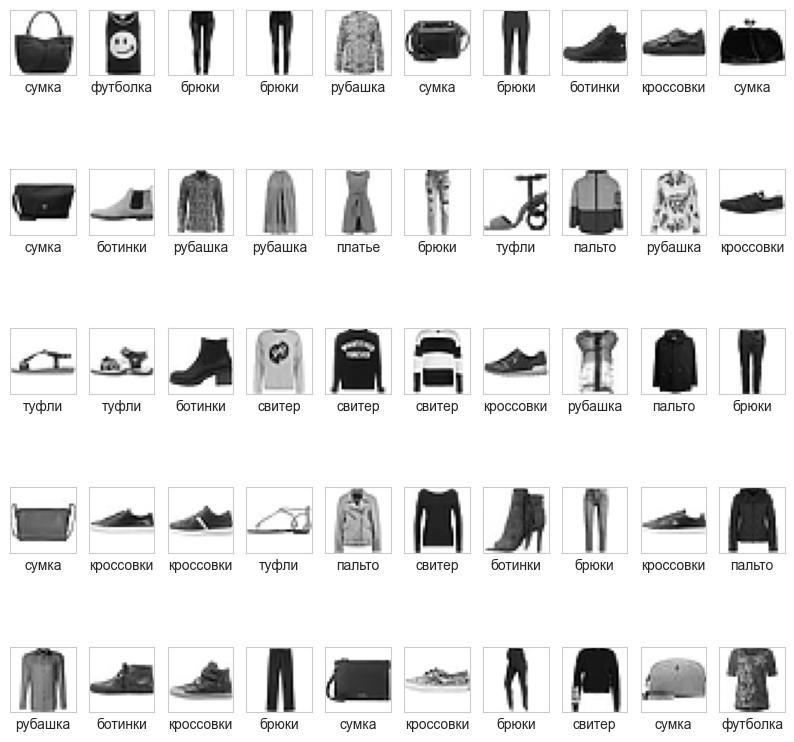

In [105]:
plt.figure(figsize=(10,10))
for i in range(100,150):
    plt.subplot(5,10,i-100+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(classes[y_train[i]])

**Преобразование размерности данных в наборе**

In [106]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

**Нормализация данных**

In [107]:
# Векторизованные операции
# Применяются к каждому элементу массива отдельно
x_train = x_train / 255
x_test = x_test / 255

**Работа с правильными ответами**

In [108]:
n = 0

In [109]:
print(y_train[n])

9


**Преобразуем метки в формат one hot encoding**

In [110]:
y_train = utils.to_categorical(y_train, 10)

In [111]:
y_test = utils.to_categorical(y_test, 10)

**Правильный ответ в формате one hot encoding**

In [112]:
print(y_train[n])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


## Создаем нейронную сеть

**Создаем последовательную модель**

In [113]:
# Создаем последовательную модель
model = Sequential()
# Входной полносвязный слой, 800 нейронов, 784 входа в каждый нейрон
model.add(Dense(800, input_dim=784, activation="relu"))
# Выходной полносвязный слой, 10 нейронов (по количеству выходных классов)
model.add(Dense(10, activation="softmax"))

C:\Users\vadim\PycharmProjects\LabsDataAnalysis\.venv\lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Компилируем сеть**

In [114]:
model.compile(loss="categorical_crossentropy", optimizer="Adam", metrics=["accuracy"])

print(model.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 800)            │       628,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         8,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 636,010 (2.43 MB)

 Trainable params: 636,010 (2.43 MB)

 Non-trainable params: 0 (0.00 B)

None


## Обучаем нейронную сеть

In [115]:
history = model.fit(x_train, y_train,
                    batch_size=200,
                    epochs=100,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8108 - loss: 0.5417 - val_accuracy: 0.8517 - val_loss: 0.4223
Epoch 2/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8614 - loss: 0.3887 - val_accuracy: 0.8693 - val_loss: 0.3684
Epoch 3/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8763 - loss: 0.3463 - val_accuracy: 0.8749 - val_loss: 0.3473
Epoch 4/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8838 - loss: 0.3187 - val_accuracy: 0.8817 - val_loss: 0.3299
Epoch 5/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8938 - loss: 0.2921 - val_accuracy: 0.8854 - val_loss: 0.3187
Epoch 6/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8982 - loss: 0.2782 - val_accuracy: 0.8787 - val_loss: 0.3277
Epoch 7/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9022 - loss: 0.2661 - val_accuracy: 0.8835 - val_loss: 0.3245
Epoch 8/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.9081 - loss: 0.2498 - val_ac

## Сохраняем нейронную сеть для последующего использования

In [116]:
model.save('fashion_mnist_dense.h5')

## Оценка качества обучения

Проверка качества работы на наборе данных для тестирования

In [117]:
scores = model.evaluate(x_test, y_test, verbose=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8941 - loss: 0.6910


In [118]:
print("Доля верных ответов на тестовых данных, в процентах:", round(scores[1] * 100, 4))

Доля верных ответов на тестовых данных, в процентах: 89.41


## Используем сеть для распознавания предметов одежды

In [119]:
n_rec = 496

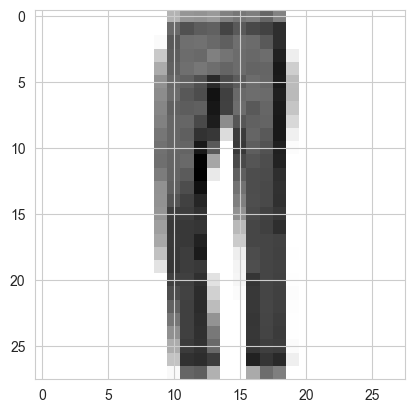

In [120]:
plt.imshow(x_test[n_rec].reshape(28, 28), cmap=plt.cm.binary)
plt.show()

**Меняем размерность изображения и нормализуем его**

In [121]:
x = x_test[n_rec]
x = np.expand_dims(x, axis=0)

**Запускаем распознавание**

In [122]:
prediction = model.predict(x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


**Печатаем результаты распознавания**

In [123]:
prediction

array([[2.3793897e-23, 1.0000000e+00, 4.9831703e-33, 3.4314318e-25,
        5.2319844e-27, 3.5444211e-35, 5.1496741e-26, 0.0000000e+00,
        9.2794251e-28, 5.1717146e-37]], dtype=float32)

**Печатаем правильный ответ**

In [124]:
label = np.argmax(y_test[n_rec])
print("Номер класса:", label)
print("Название класса:", classes[label])

Номер класса: 1
Название класса: брюки


## Загружаем свою картинку

Загружаем картинку из файла

In [125]:
img_path = 'img/tshirt.webp'
img = image.load_img(img_path, target_size=(28, 28), color_mode = "grayscale")

Показываем картинку

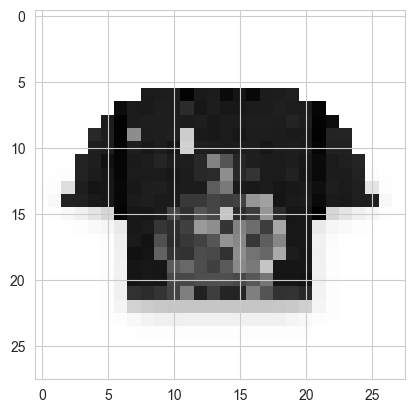

In [126]:
plt.imshow(img.convert('RGBA'))
plt.show()

Преобразуем картинку для обработки нейронной сетью

In [127]:
# Преобразуем картинку в массив
x = image.img_to_array(img)
# Меняем форму массива в плоский вектор
x = x.reshape(1, 784)
# Инвертируем изображение
x = 255 - x
# Нормализуем изображение
x /= 255

Запускаем распознавание

In [128]:
prediction = model.predict(x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Результаты распознавания

In [129]:
prediction

array([[9.99999881e-01, 3.95739135e-20, 7.93977991e-12, 1.78884306e-16,
        4.23144115e-08, 3.83353771e-15, 1.82557667e-08, 2.74548369e-13,
        1.08628726e-07, 6.40324026e-22]], dtype=float32)

In [130]:
prediction = np.argmax(prediction)
print("Номер класса:", prediction)
print("Название класса:", classes[prediction])

Номер класса: 0
Название класса: футболка


## Keras Tuner

Keras Tuner - это простая среда для автоматизации настройки оптимальных гиперпараметров. Поставляется со встроенными алгоритмами случайного поиска, гиперполосной оптимизации и байесовской оптимизации.<br/>

Последовательность настройки гиперпараметров:
*   Определить модель
*   Указать гиперпараметры для настройки
*   Определить пространство поиска
*   Определить алгоритм поиска

### Определение модели
Модель, которая создается для гипертюнинга, называется *гипермоделью*.
Есть два способа построить гипермодель:
*  Используя функцию построителя модели
*  Используя подкласс [HyperModel](https://keras.io/guides/keras_tuner/getting_started/#you-can-use-a-hypermodel-subclass-instead-of-a-modelbuilding-function) API Keras Tuner


Воспользуемся первым способом. Функция построения модели использует определенные гиперпараметры для возврата скомпилированной модели.

### Гиперпараметры для настройки
Гмпермодель очень похожа на неглубокую DNN, которая была обучена ранее, за исключением того, что будут настроены четыре гиперпараметра модели:
1.   Количество скрытых слоев
2.   Количество нейронов в каждом скрытом слое
3.   Процент выпадения после каждого скрытого слоя
4.   Скорость обучения оптимизатора Adam
    
    
    

### Определение пространства поиска
Это делается путем передачи объекта HyperParameters в качестве параметра функции построения модели, которая настраивает гиперпараметры. Используем следующие параметры:
*   hp.Int() для определения области поиска по количеству скрытых слоев и количества нейронов в каждом скрытом слое. Позволяет определять минимальные и максимальные значения, а также размер шага для увеличения.
*   hp.Float() для определения области поиска параметра droput. Похоже на hp.In(), за исключением того, что принимает плавающие значения.
*   hp.Choice() для определения области поиска скорости обучения. Позволяет определять дискретные значения.
Более подробную информацию обо всех доступных методах и их использовании можно найти в [официальной документации](https://keras.io/api/keras_tuner/hyperparameters/).




In [131]:
!pip install keras-tuner -q


[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [132]:
import kerastuner as kt

In [133]:
def build_model(hp):
    """
    Builds model and sets up hyperparameter space to search.

    Parameters
    ----------
    hp : HyperParameter object
        Configures hyperparameters to tune.

    Returns
    -------
    model : keras model
        Compiled model with hyperparameters to tune.
    """
    # Initialize sequential API and start building model.
    model = keras.Sequential()
    # model.add(keras.layers.Flatten(input_shape=(28,28)))

    # Tune the number of hidden layers and units in each.
    # Number of hidden layers: 1 - 5
    # Number of Units: 32 - 512 with stepsize of 32
    for i in range(1, hp.Int("num_layers", 1, 5)):
        model.add(
            keras.layers.Dense(
                units=hp.Int("units_" + str(i), min_value=32, max_value=512, step=32),
                activation="relu", input_dim=784,)
            )

        # Tune dropout layer with values from 0 - 0.3 with stepsize of 0.1.
        model.add(keras.layers.Dropout(hp.Float("dropout_" + str(i), 0, 0.3, step=0.1)))

    # Add output layer.
    model.add(keras.layers.Dense(units=10, activation="softmax"))

    # Tune learning rate for Adam optimizer with values from 0.01, 0.001, or 0.0001
    hp_learning_rate = hp.Choice("learning_rate", values=[1e-2, 1e-3, 1e-4])

    # Define optimizer, loss, and metrics
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                  loss="categorical_crossentropy",
                  # loss=keras.losses.SparseCategoricalCrossentropy(),
                  metrics=["accuracy"])

    return model

# model.compile(loss="categorical_crossentropy", optimizer="Adam", metrics=["accuracy"])

### Определение алгоритма поиска
Для поиска оптимальных гиперпараметров будем использовать алгоритм Hyperband. Это новый подход, разработанный специально для оптимизации гиперпараметров. Подробное описание алгоритма можно найти [здесь](https://jmlr.org/papers/v18/16-558.html).
Основная идея алгоритма: Hyperband использует сетку в стиле спортивного чемпионата и начинает со случайного выбора большого количества моделей со случайными перестановками гиперпараметров из области поиска. Каждая модель обучается в течение нескольких эпох, затем наиболее эффективная половина моделей переходит в следующий раунд.<br/>
Чтобы создать экземпляр тюнера, нужно определить следующие гиперпараметры:
*   Гипермодель (функция построителя моделей).
*   Цель - направление поиска (минимальное или максимальное), автоматически определяется для встроенных метрик, для пользовательских метрик можно использовать kerastuner.Objective.
*   Factor и max_epochs используются для расчета количества моделей путем взятия логарифмического базового фактора max_epochs + 1. Это число округляется до ближайшего целого числа.
*   Итерации Hyperband используются для управления ресурсами. Гиперполосные итерации - это количество повторений по всему алгоритму поиска.
*   Каталог сохраняет журналы и контрольные точки для каждого пробного запуска во время поиска по гиперпараметрам, что позволяет продолжить поиск с того места, где остановились в последний раз. Данную опцию можно отключить, установив дополнительный гиперпараметр «overwrite» = True.
*   Project_name используется для отличия от других запусков и является подкаталогом в каталоге.<br/>
Со списком всех доступных параметров можно ознакомиться в [документации](https://keras.io/api/keras_tuner/tuners/hyperband/).






In [134]:
# Instantiate the tuner
tuner = kt.Hyperband(build_model,
                     objective="val_accuracy",
                     max_epochs=100,
                     factor=3,
                     hyperband_iterations=10,
                     directory="kt_dir",
                     project_name="kt_hyperband")

Reloading Tuner from kt_dir\kt_hyperband\tuner0.json


Сводка пространства поиска

In [135]:
tuner.search_space_summary()

Search space summary
Default search space size: 10
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 5, 'step': 1, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
dropout_1 (Float)
{'default': 0.0, 'conditions': [], 'min_value': 0.0, 'max_value': 0.3, 'step': 0.1, 'sampling': 'linear'}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
dropout_2 (Float)
{'default': 0.0, 'conditions': [], 'min_value': 0.0, 'max_value': 0.3, 'step': 0.1, 'sampling': 'linear'}
units_3 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
dropout_3 (Float)
{'default': 0.0, 'conditions': [], 'min_value': 0.0, 'max_value': 0.3, 'step': 0.1, 'sampling': 'li

Установим обратные вызовы с ранней остановкой, чтобы прервать обучение, если показатели модели не улучшаются.

In [136]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

# Запускаем поиск
NUM_EPOCHS = 100
tuner.search(x_train, y_train, epochs=NUM_EPOCHS, validation_split=0.2, callbacks=[stop_early], verbose=1)

Trial 143 Complete [00h 01m 48s]
val_accuracy: 0.8981666564941406

Best val_accuracy So Far: 0.8981666564941406
Total elapsed time: 00h 58m 06s

Search: Running Trial #144

Value             |Best Value So Far |Hyperparameter
3                 |2                 |num_layers
0.0001            |0.001             |learning_rate
448               |352               |units_1
0.2               |0                 |dropout_1
320               |128               |units_2
0.2               |0.1               |dropout_2
416               |96                |units_3
0                 |0.1               |dropout_3
224               |480               |units_4
0.2               |0                 |dropout_4
34                |34                |tuner/epochs
12                |12                |tuner/initial_epoch
4                 |4                 |tuner/bracket
3                 |3                 |tuner/round
0135              |0134              |tuner/trial_id

Epoch 13/34
1500/1500 ━━━━━━━━━━


KeyboardInterrupt



После завершения поиска можно получить лучшие гиперпараметры и переобучить модель.

In [ ]:
# Get the optimal hyperparameters from the results
best_hps=tuner.get_best_hyperparameters()[0]

# Build model
h_model = tuner.hypermodel.build(best_hps)

# Train the hypertuned model
h_model.fit(x_train, y_train, epochs=NUM_EPOCHS, validation_split=0.2, callbacks=[stop_early], verbose=1)

Оценить гипертонастроенную модель на тестовом наборе.